<a href="https://colab.research.google.com/github/BahetiGiriraj/demo-/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pd.read_csv("heart-disease.csv")

Probelm Definition

Data

Evaluation

Features

Modelling

Experimentation


In [2]:
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_disease.size

4242

In [4]:
heart_disease.shape

(303, 14)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import classification_report , confusion_matrix , precision_score , recall_score , f1_score
from sklearn.metrics import roc_curve , roc_auc_score

In [6]:
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_disease["target"].value_counts()

,count
target,
1,165
0,138


In [8]:
#1 - heart_disease
#0 - no heart_disease

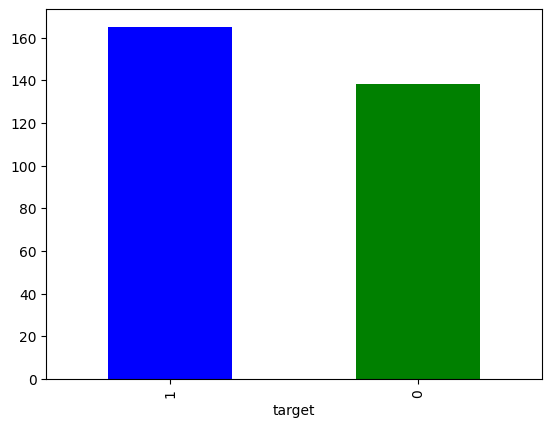

In [9]:
heart_disease["target"].value_counts().plot(kind = "bar" , color =["blue" , "green"])
title = "Heart Disease"
xlabel = "Target"
ylabel = "Count"

In [10]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
heart_disease.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# compare column
pd.crosstab(heart_disease["age"] , heart_disease["target"])

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


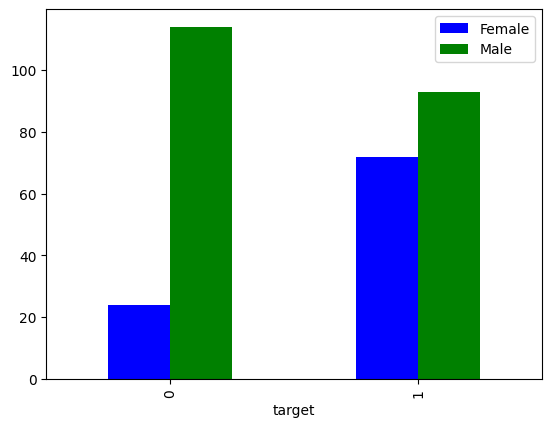

In [14]:
pd.crosstab(heart_disease["target"] , heart_disease["sex"]).plot(kind = "bar" , color =["blue" , "green"])
plt.legend(["Female" , "Male"])

In [15]:
heart_disease.sex.value_counts()
# 1 is male
# 0 is female

,count
sex,
1,207
0,96


Only 14 attributes used:

      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. target - have disease or not (1=yes , 0=no)
      

Complete attribute documentation:

      1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     20 ekgmo (month of exercise ECG reading)
     21 ekgday(day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used
     76 name: last name of patient  (I replaced this with the dummy string "name")

In [16]:
# finding patterns
# thalach: maximum heart rate achieved


# age vs max heart rate

Text(0.5, 1.0, 'Age vs max heart rate')

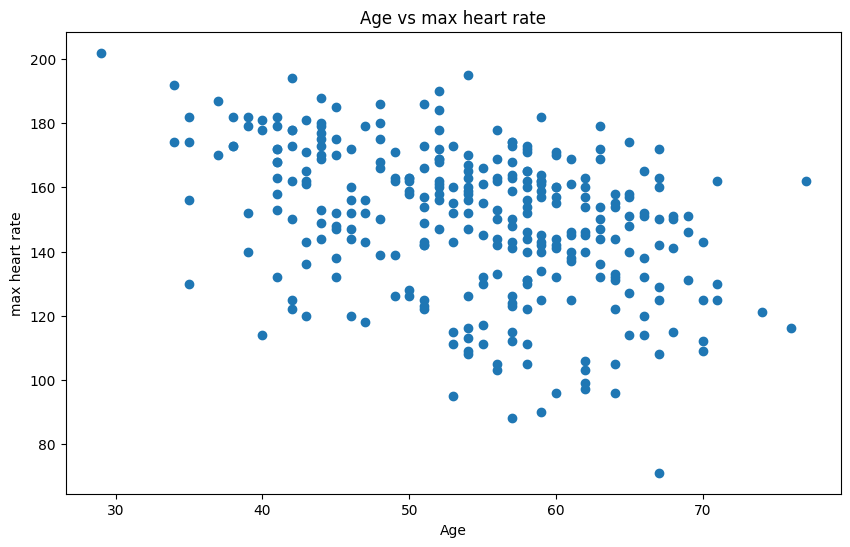

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(heart_disease["age"] , heart_disease["thalach"])
plt.xlabel("Age")
plt.ylabel("max heart rate")
plt.title("Age vs max heart rate")


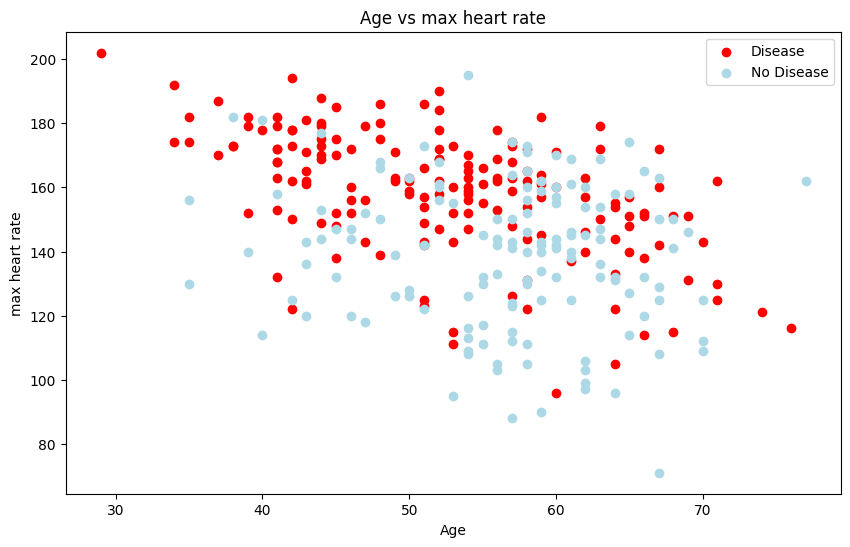

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(heart_disease.age[heart_disease.target == 1] , heart_disease.thalach[heart_disease.target == 1] , color = "red")
plt.scatter(heart_disease.age[heart_disease.target == 0] , heart_disease.thalach[heart_disease.target == 0] , c="lightblue")
plt.xlabel("Age")
plt.ylabel("max heart rate")
plt.title("Age vs max heart rate")
plt.legend(["Disease" , "No Disease"])


In [19]:
heart_disease["cp"].value_counts()

,count
cp,
0,143
2,87
1,50
3,23


# heart disease freq per chest  pain type
cp: chest pain type

    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic

In [20]:
pd.crosstab(heart_disease.cp , heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


([<matplotlib.axis.XTick at 0x7ae7e5948df0>,
 [Text(0, 0, 'typical angina'),
  Text(1, 0, 'atypical angina'),
  Text(2, 0, 'non-anginal pain'),
  Text(3, 0, 'asymptomatic')])

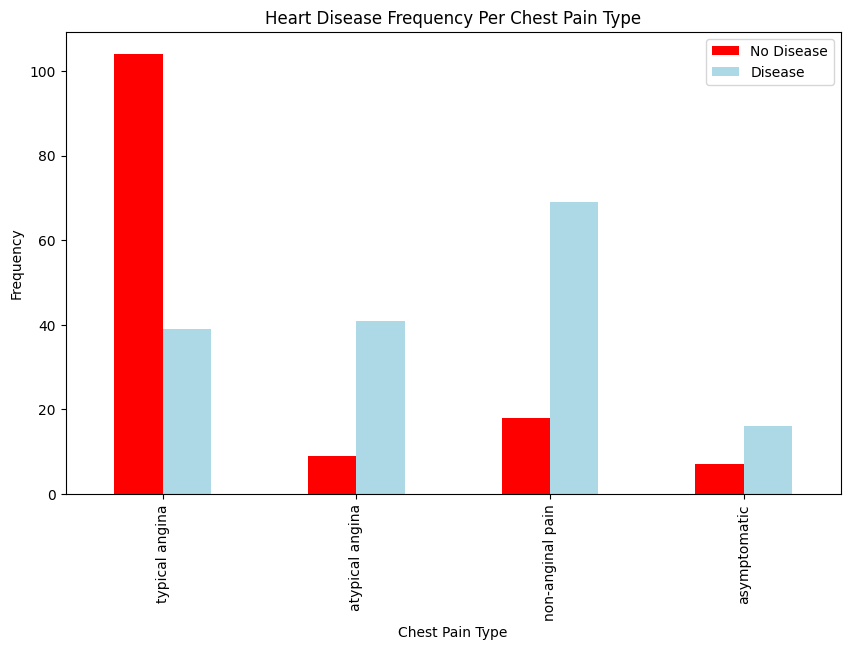

In [21]:
pd.crosstab(heart_disease.cp , heart_disease.target).plot(kind="bar" , figsize=(10,6) , color = ["red" , "lightblue"])
plt.legend(["No Disease" , "Disease"])
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xticks([0,1,2,3],["typical angina" , "atypical angina" , "non-anginal pain" , "asymptomatic"])

In [22]:
# building co-relation matrix

In [23]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


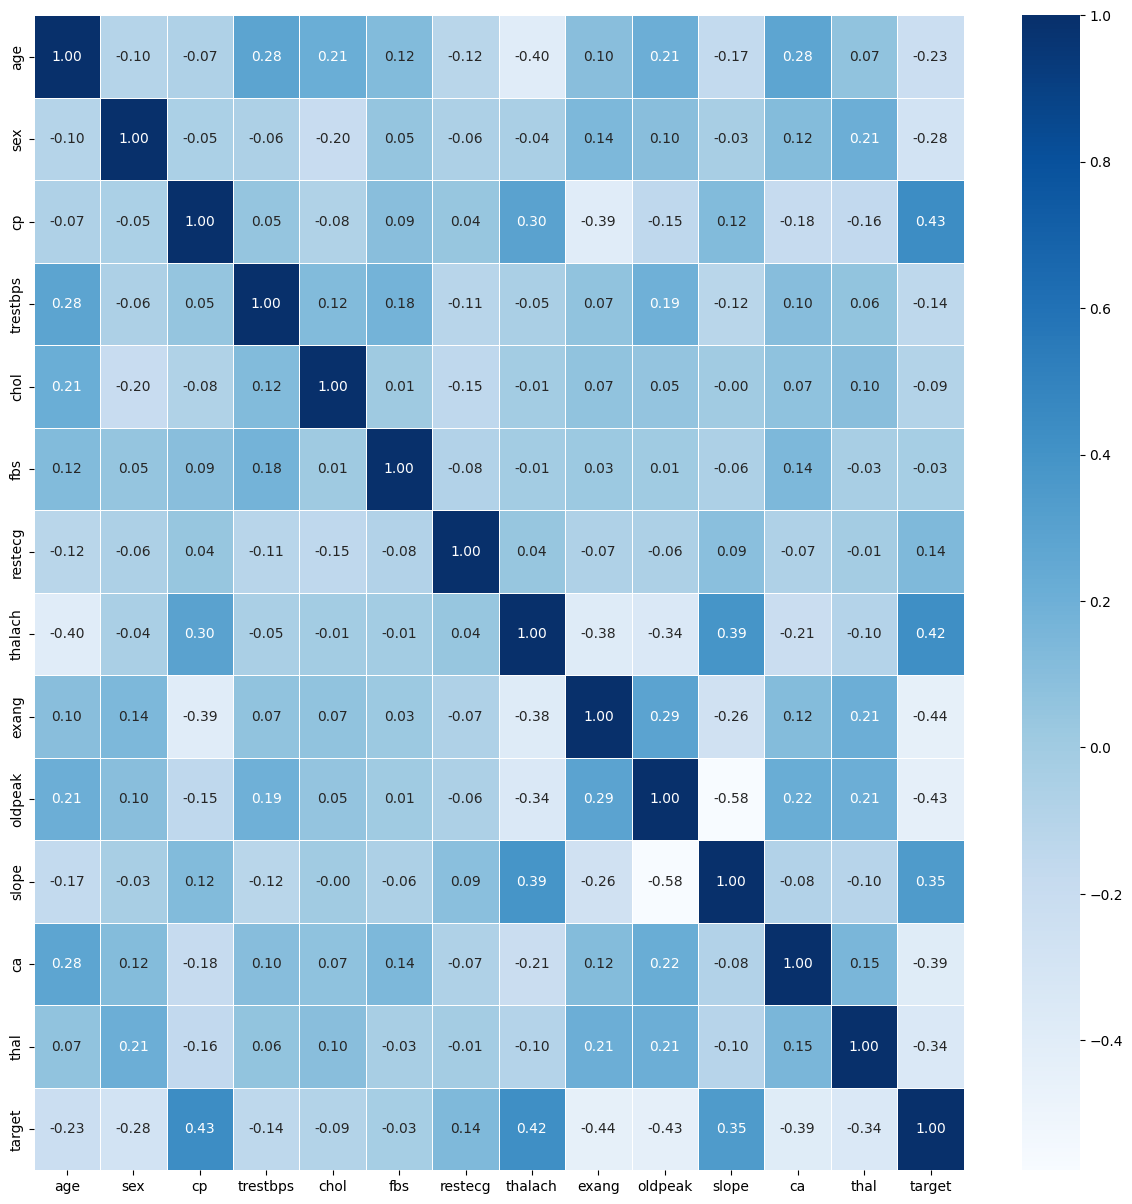

In [24]:
# lets  make our correlation matrix a little prettier
corr_matrix = heart_disease.corr()
fig , ax = plt.subplots(figsize = (15,15))

ax=sns.heatmap(corr_matrix , annot = True , linewidths = 0.5 , fmt = ".2f" , cmap = "Blues")

In [25]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='exang'>

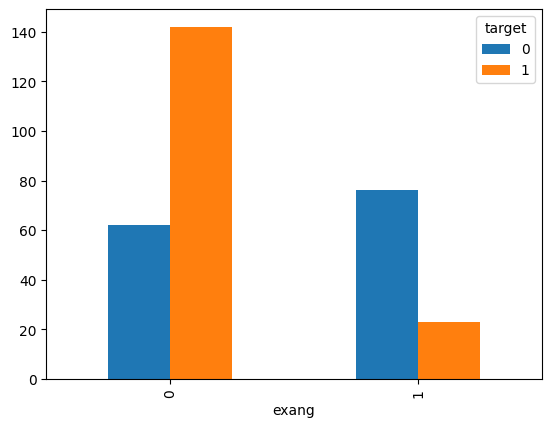

In [26]:
pd.crosstab(heart_disease.exang , heart_disease.target).plot(kind="bar")   #exang: exercise induced angina (1 = yes; 0 = no)

In [27]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [28]:
x=heart_disease.drop("target" , axis = 1)
y=heart_disease["target"]

In [29]:
np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [30]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [31]:
y_train

,target
132,1
202,0
196,0
75,1
176,0
...,...
188,0
71,1
106,1
270,0


In [32]:
# which model should I use ?

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

we are going to try 3 diff models
1. RandomForestClassifier
2. LogisticRegression
3. KNeighborsClassifier

In [33]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """

    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [34]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
print(model_scores)


{'Logistic Regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# another method
log=LogisticRegression()
log.fit(x_train , y_train)
clf=RandomForestClassifier()
clf.fit(x_train , y_train)
knn=KNeighborsClassifier()
knn.fit(x_train , y_train)

log.score(x_test , y_test) , clf.score(x_test , y_test) , knn.score(x_test , y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8852459016393442, 0.8524590163934426, 0.6885245901639344)

In [36]:
model_compare = pd.DataFrame(model_scores , index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


<Axes: >

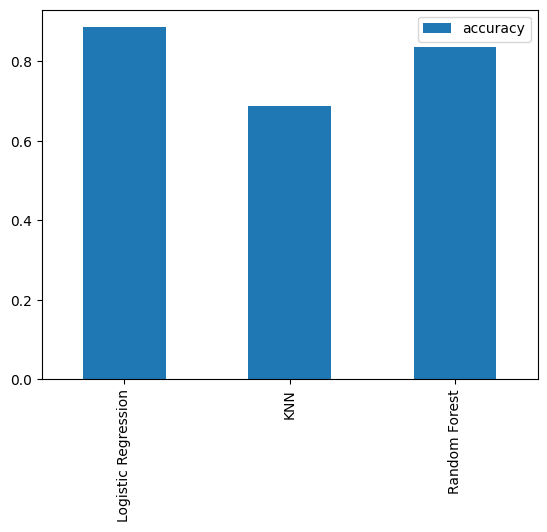

In [37]:
model_compare = pd.DataFrame(model_scores , index=["accuracy"])
model_compare.T.plot.bar()

In [38]:
# Hyper Tuning

Now we have got a baseline model ...  and we know a model's first prediction are'nt always what we should based our next steps off .
what sholud do ?

Let's look at this
* Hyperparameter tunning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* `F1` score
* Classification report
* ROC curve
* Area under the curve (AUC)

In [39]:
# Let's tune KNN

train_score = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn= KNeighborsClassifier()

# loop through different n_neoghbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(x_train , y_train)

    # Update the training
    # knn.score(x_train , y_train)
    train_score.append(knn.score(x_train , y_train))
    test_score.append(knn.score(x_test , y_test))


    # knn.score(x_train , y_train)

In [40]:
train_score


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [41]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on the test data : 75.41%


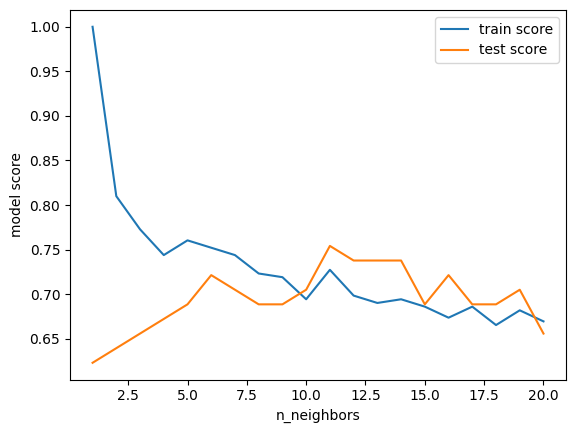

In [42]:
plt.plot(neighbors , train_score , label="train score")
plt.plot(neighbors , test_score , label="test score")
plt.xlabel("n_neighbors")
plt.ylabel("model score")
plt.legend()

print(f"Max KNN score on the test data : {max(test_score)*100:.2f}%")

In [43]:
from sklearn.model_selection import RandomizedSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression

In [44]:
log_reg_grid = {"C": np.logspace(-4,4,20) ,
              "solver" : ["liblinear"]
              }

# create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth" : [None,3,5,10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)
           } #np arange 1 to 20 step 2

In [45]:
# Now we have hyperparameter grid setup of our models , let tune them using RandomizedSearchCV

In [46]:
# tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [48]:
rs_log_reg.score(x_test ,y_test)

0.8852459016393442

In [49]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_rf.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [51]:
rs_rf.score(x_train , y_train )

0.8553719008264463

In [52]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [53]:
# hyper tunning using gridsearchcv

In [54]:
log_reg_grid = {"C": np.logspace(-4,4,30) ,
              "solver" : ["liblinear"]
              }

# create hyperparameter grid for logicsticregression

gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True)

# fit grid hyperparameter search model for LogisticRegression
gs_log_reg.fit(x_train , y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [55]:
gs_log_reg.score(x_test , y_test)

0.8852459016393442

Evaluting our tuned machine learning classifier , beyond accuracy

ROC curve and AUC score

Confusion matrix

Classification report

Precision

Recall

F1 -score

... and it would be great if cross validation was used where possible

To make comparisons and evaluate our trained model , first we need to make predictions

In [56]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [57]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [58]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [60]:
# Import roc cureve
from sklearn.metrics import roc_curve ,RocCurveDisplay

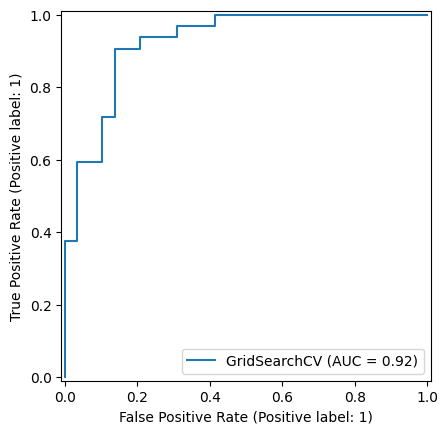

In [65]:
# Plot roc curve and calculate auc metrics
RocCurveDisplay.from_estimator(gs_log_reg , x_test , y_test)

In [66]:
# confusion metrics
print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


In [67]:
sns

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

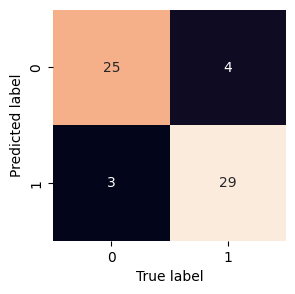

In [73]:
def plot_conf_matrix(y_test , y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_matrix(y_test , y_preds)

In [74]:
29+23

52

In [75]:
52+7

59

In [76]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [77]:
# we should do cv for precision , recall , f1-score , support

In [78]:
# Calculate evalution metrics using cross validiation

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
# chech best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
clf=LogisticRegression(C=0.20433597178569418, solver ='liblinear')


In [101]:
# cross validated acc

cv_acc= cross_val_score(clf , x, y , cv =5 , scoring = "accuracy").mean()
cv_acc

0.8446994535519124

In [102]:
cv_acc.mean()

0.8446994535519124

In [103]:
# cv precision
cv_precision= cross_val_score(clf , x, y , cv =5 , scoring = "precision").mean()
cv_precision

0.8207936507936507

In [104]:
cv_precision.mean()

0.8207936507936507

In [105]:
cv_recall= cross_val_score(clf , x, y , cv =5 , scoring = "recall").mean()
cv_recall

0.9212121212121213

In [106]:
cv_recall.mean()

0.9212121212121213

In [107]:
cv_f1= cross_val_score(clf , x, y , cv =5 , scoring = "f1").mean()
cv_f1

0.8673007976269721

In [108]:
cv_f1.mean()

0.8673007976269721

In [109]:
# visulation our cv

In [112]:
cv_metrics =pd.DataFrame({"Accuracy":cv_acc , "Precision":cv_precision , "Recall":cv_recall , "F1":cv_f1} , index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


<Axes: >

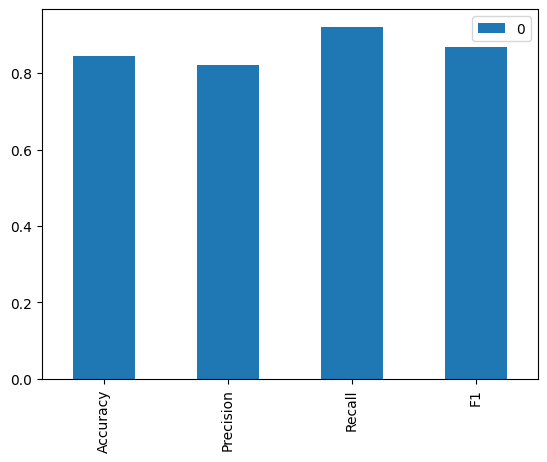

In [113]:
cv_metrics.T.plot.bar()

In [114]:
# Feature Importance

# another way as asking , which feature contributed most to the outcome of model and how they did contribute?

In [116]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [117]:
clf=LogisticRegression(C=0.20433597178569418, solver ='liblinear')
clf.fit(x_train , y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [118]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [119]:
#  match coef with column

feature_dict=dict(zip(x.columns , clf.coef_[0]))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

<Axes: >

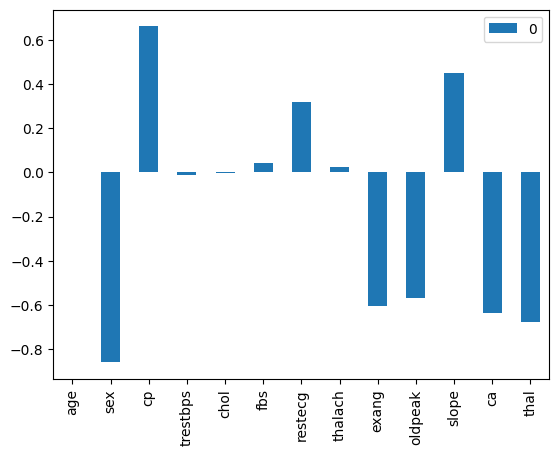

In [120]:
# by matplotlib
feature_df=pd.DataFrame(feature_dict , index=[0])
feature_df.T.plot.bar()